In [ ]:
!pip install idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import os
import cv2 as cv
import warnings
import random
import idx2numpy
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
file_path = "gdrive/MyDrive/A2_Q3"

In [ ]:
#converting datasets to nd-array using convert_file_from using id2numpy.
#idx2 is a numpy package that is used for converting files to numpy.ndarray. 
x_test= idx2numpy.convert_from_file('/content/gdrive/MyDrive/A2_Q3/t10k-images-idx3-ubyte')
y_test= idx2numpy.convert_from_file('/content/gdrive/MyDrive/A2_Q3/t10k-labels-idx1-ubyte')
x_train= idx2numpy.convert_from_file('/content/gdrive/MyDrive/A2_Q3/train-images-idx3-ubyte')
y_train= idx2numpy.convert_from_file('/content/gdrive/MyDrive/A2_Q3/train-labels-idx1-ubyte')

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#Visualization

In [ ]:

temp = []                       #temp is the temporary array that stores all the indexes from y_train corresponding to each class.
indexes = []                    #indexes is the array that stores the first 2 elements of temp array.

for i in range(10):
  temp.append(np.where(y_train == i))


for i in range(10):
  a=temp[i][0][0]
  b=temp[i][0][1]
  indexes.extend([a,b])

print('Temporary Array :')
print(temp)
print('\n\nIndexes Array :',indexes)

Temporary Array :
[(array([    1,    21,    34, ..., 59952, 59972, 59987]),), (array([    3,     6,     8, ..., 59979, 59984, 59994]),), (array([    5,    16,    25, ..., 59983, 59985, 59991]),), (array([    7,    10,    12, ..., 59978, 59980, 59996]),), (array([    2,     9,    20, ..., 59943, 59951, 59975]),), (array([    0,    11,    35, ..., 59968, 59993, 59997]),), (array([   13,    18,    32, ..., 59982, 59986, 59998]),), (array([   15,    29,    38, ..., 59963, 59977, 59988]),), (array([   17,    31,    41, ..., 59989, 59995, 59999]),), (array([    4,    19,    22, ..., 59973, 59990, 59992]),)]


Indexes Array : [1, 21, 3, 6, 5, 16, 7, 10, 2, 9, 0, 11, 13, 18, 15, 29, 17, 31, 4, 19]


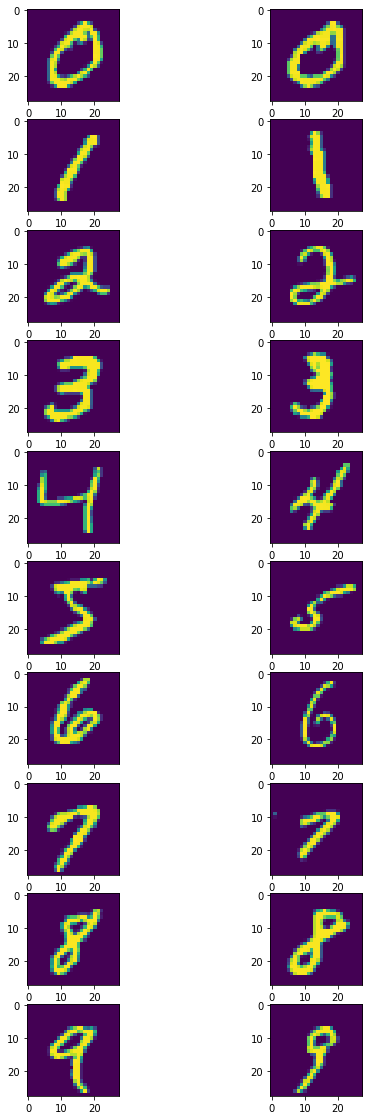

In [ ]:
#taking values from indexes array and printing from x_train[index].
plt.figure(figsize=(8,20))
for i in range(len(indexes)):
  plt.subplot(10,2,i+1)
  plt.imshow(x_train[indexes[i]])
plt.show()


#OVR (One vs Rest)

##### One-vs-Rest (OvR) or One-vs-All(OvA) is an approach to making binary classification algorithms capable of working as multiclass classification algorithms. This approach mainly splits the multiclass data as binary classification data so that the binary classification algorithms can be applied to convert binary classification data. 

In [ ]:
#Reshaping dataset to 2D format.

x_test = x_test.reshape((-1,784))
x_train = x_train.reshape((-1,784))

In [ ]:
#making object of OVR and fitting the model.
ovr_model = OneVsRestClassifier(LogisticRegression())
ovr_model.fit(x_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
y_pred = ovr_model.predict(x_test)

#####Accuracy is the ratio of the number of correctly classified instances to the total number of instances. In onther words, Accuracy = sum of all diagonal elements/total elements => (TP+TN)/(TP+TN+FP+FN). 

In [46]:
matrix = confusion_matrix(y_test, y_pred)
arr = matrix.diagonal()/matrix.sum(axis=1)
for i in range(len(arr)):
  x = round(arr[i], 3)
  print('Accuracy of class {}: {}'.format(i,x))

Accuracy of class 0: 0.977
Accuracy of class 1: 0.983
Accuracy of class 2: 0.877
Accuracy of class 3: 0.906
Accuracy of class 4: 0.927
Accuracy of class 5: 0.854
Accuracy of class 6: 0.949
Accuracy of class 7: 0.919
Accuracy of class 8: 0.877
Accuracy of class 9: 0.897


In [47]:
print('Accuracy of OvR Classifier: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of OvR Classifier: 0.92


#OVO (One vs One)

In [48]:
ovo_model = OneVsOneClassifier(LogisticRegression())
ovo_model.fit(x_train, y_train)

y_pred = ovo_model.predict(x_test)


Accuracy of OvO Classifier: 0.93


In [49]:
matrix = confusion_matrix(y_test, y_pred)
arr = matrix.diagonal()/matrix.sum(axis=1)
for i in range(len(arr)):
  x = round(arr[i], 3)
  print('Accuracy of class {}: {}'.format(i,x))

Accuracy of class 0: 0.971
Accuracy of class 1: 0.976
Accuracy of class 2: 0.914
Accuracy of class 3: 0.921
Accuracy of class 4: 0.956
Accuracy of class 5: 0.865
Accuracy of class 6: 0.941
Accuracy of class 7: 0.926
Accuracy of class 8: 0.897
Accuracy of class 9: 0.897


In [50]:
print('Accuracy of OvO Classifier: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of OvO Classifier: 0.93
